In [2]:
import pandas as pd
df=pd.read_csv("/content/Pizzasales.csv")
df.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
df.isnull()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,False,False,False,False,False,False,False,False,False,False,False,False
48616,False,False,False,False,False,False,False,False,False,False,False,False
48617,False,False,False,False,False,False,False,False,False,False,False,False
48618,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
print(df.dtypes)

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object


In [6]:
df['order_date']=pd.to_datetime(df['order_date'],errors='coerce')
df['day']=df['order_date'].dt.day
df['month']=df['order_date'].dt.month

df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day,month
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1.0,1.0
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1.0,1.0
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1.0,1.0
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1.0,1.0
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1.0,1.0


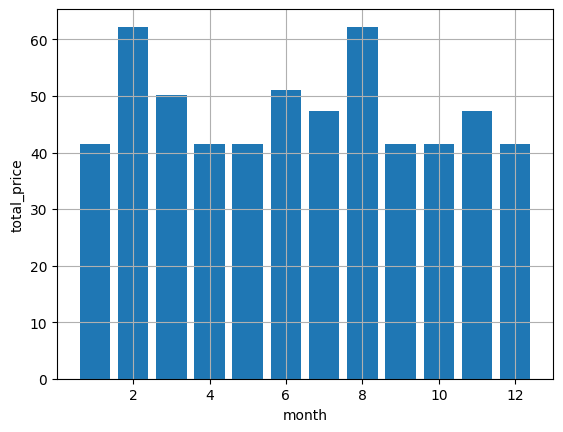

In [7]:
import matplotlib.pyplot as plt
x=df['month']
y=df['total_price']


plt.bar(x,y)
plt.xlabel('month')
plt.ylabel('total_price')
plt.grid()

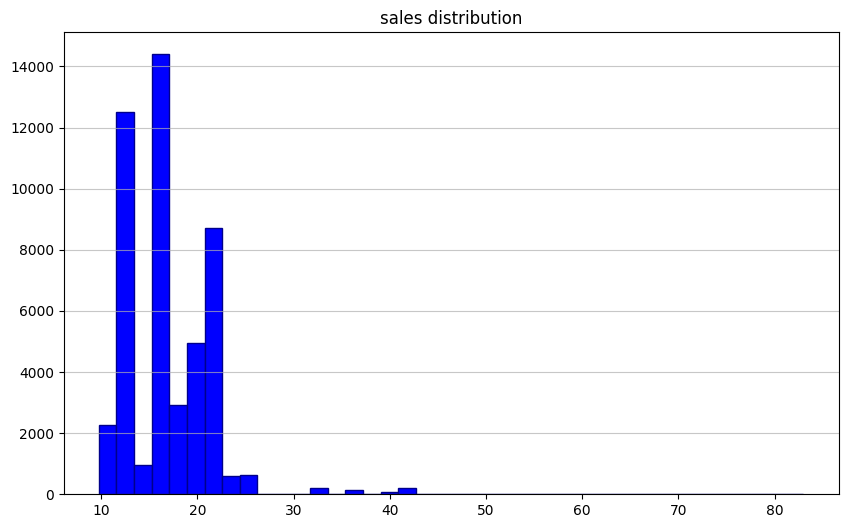

In [8]:
data=df['total_price']
plt.figure(figsize=(10,6))
plt.hist(df['total_price'],bins=40,color='blue',edgecolor='darkblue')
plt.title('sales distribution')
plt.grid(axis='y',linestyle='-',alpha=0.7)
plt.show()

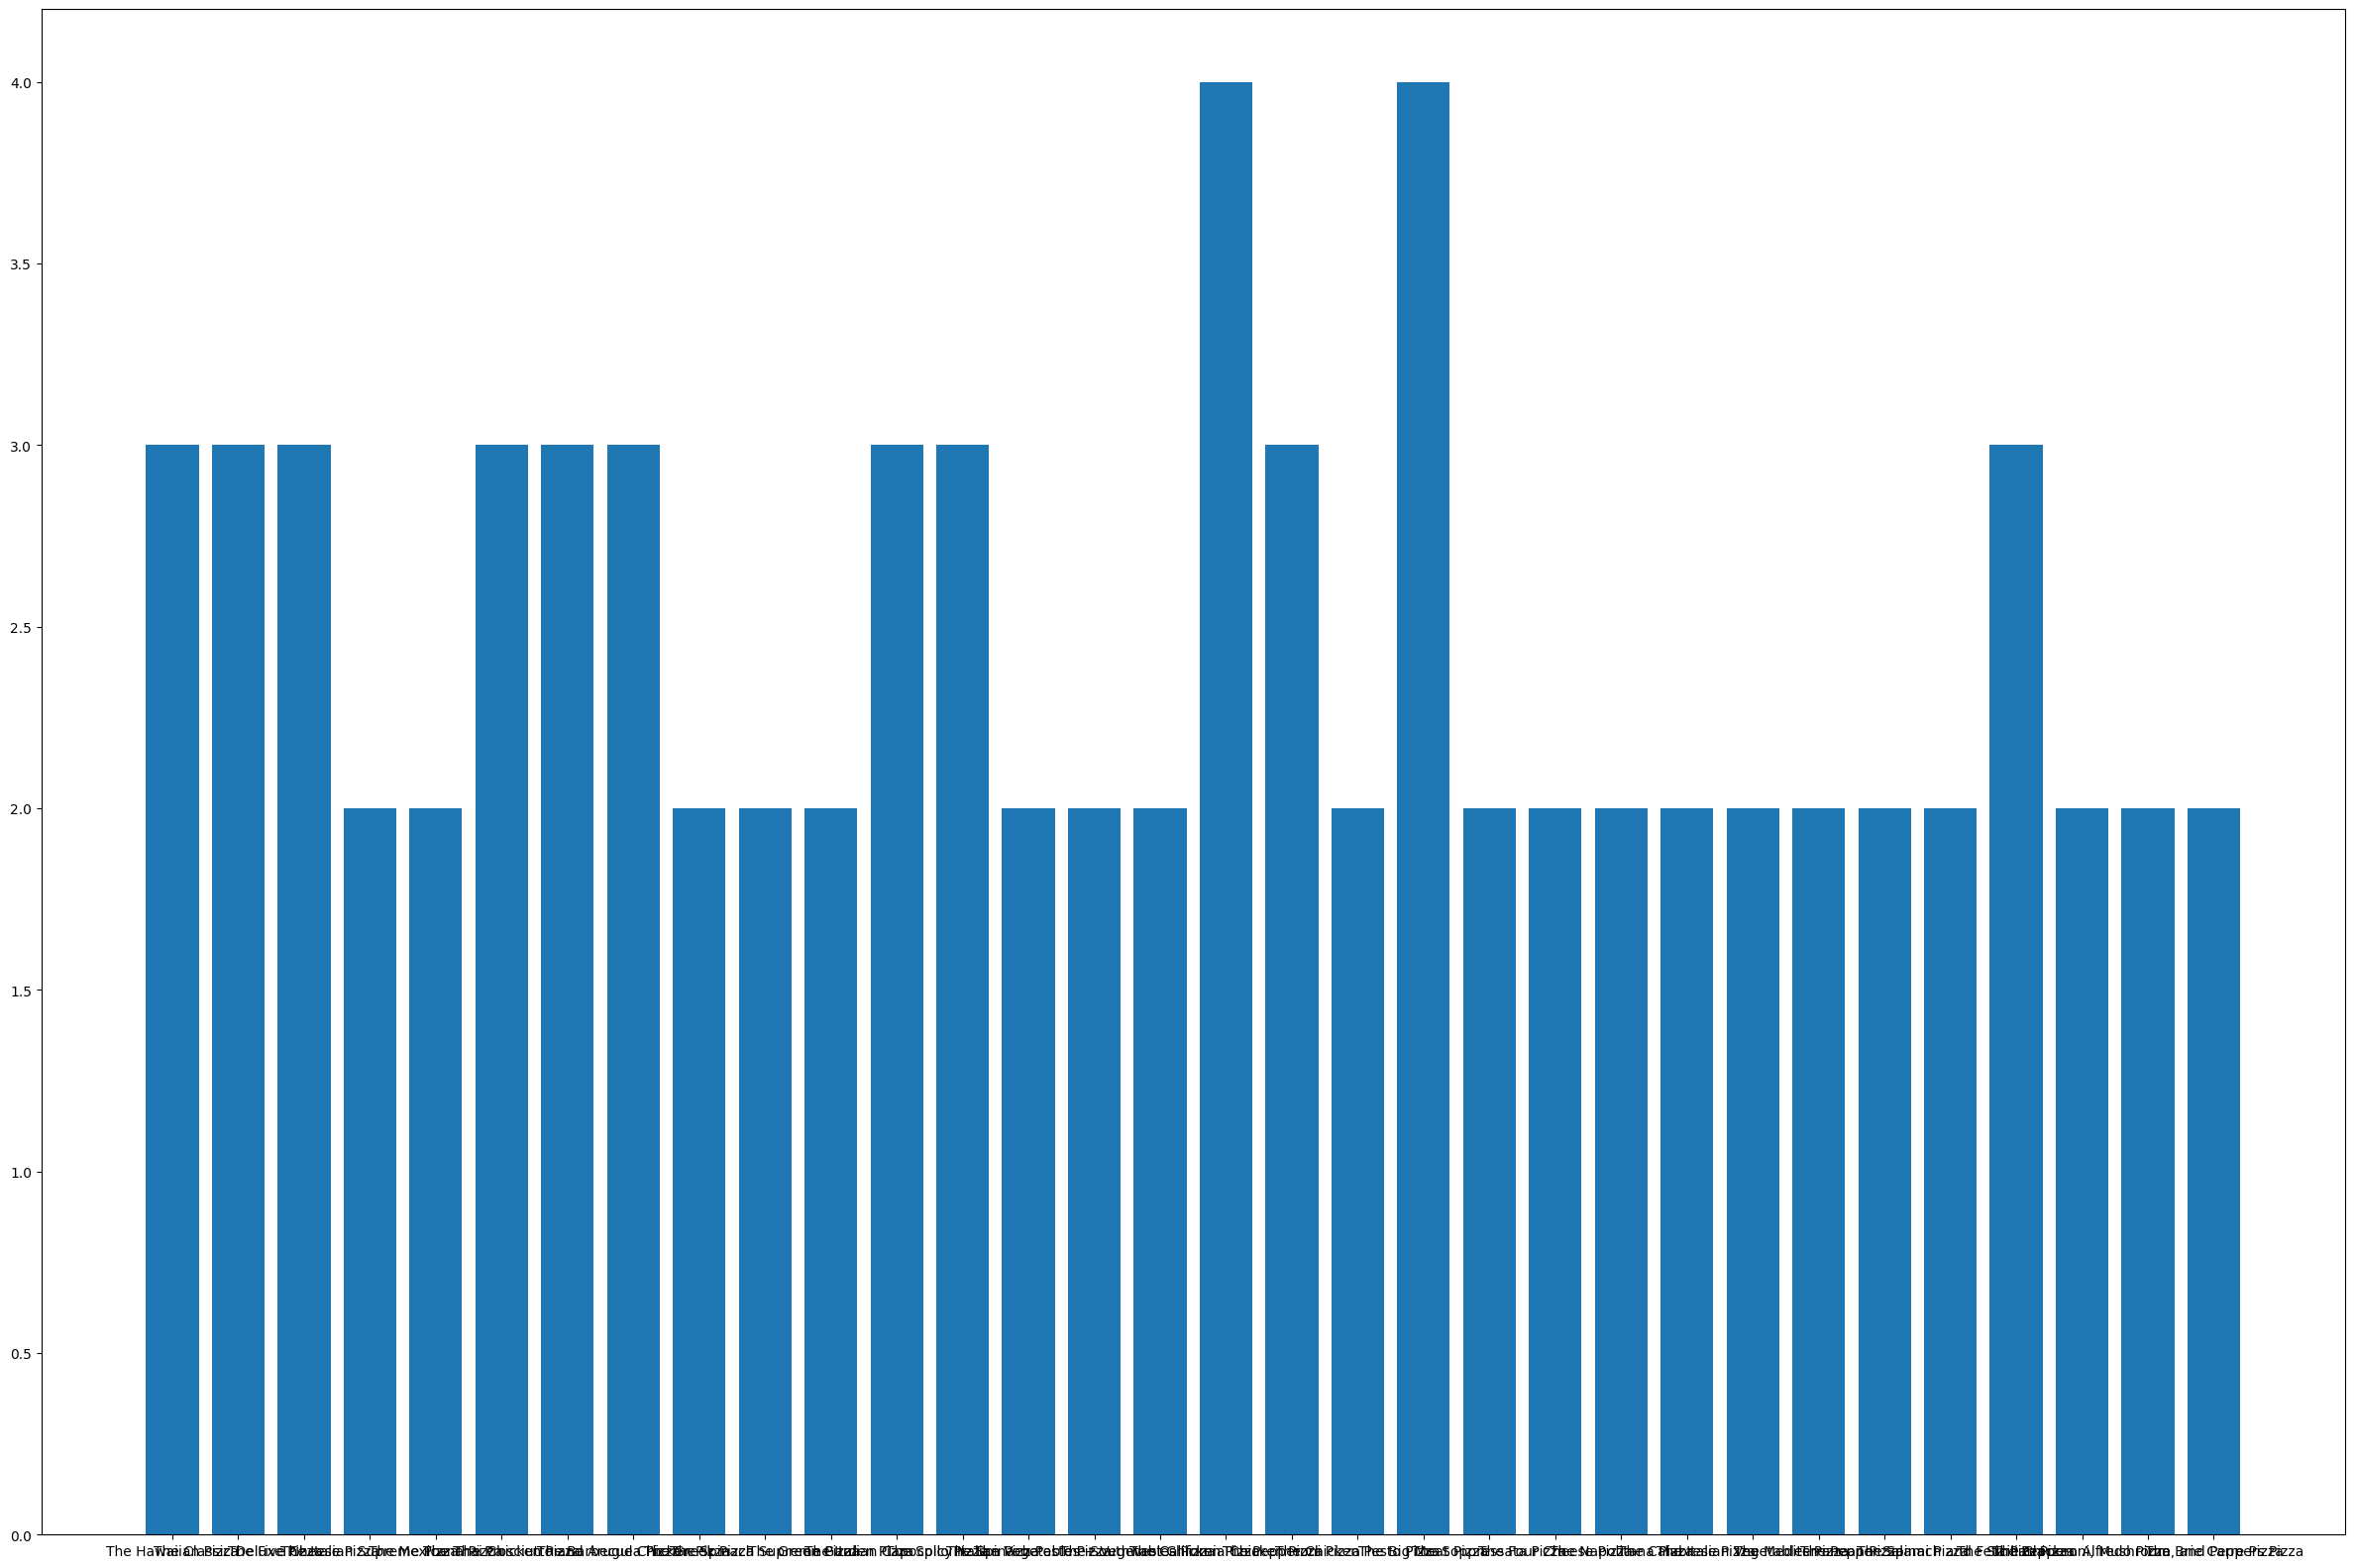

In [9]:
x=df['pizza_name']
y=df['quantity']
plt.figure(figsize=(30,20))
plt.bar(x,y)
plt.show()

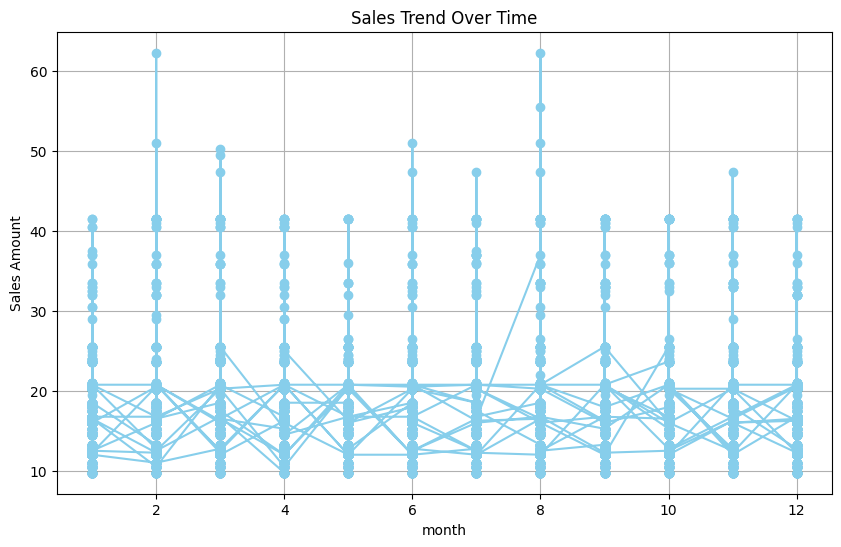

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['month'], df['total_price'], marker='o', color='skyblue', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('month')
plt.ylabel('Sales Amount')
#plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()

In [11]:
total_spend=df.groupby('pizza_id')['total_price'].sum()

In [12]:
num_orders=df.groupby('pizza_id')['order_id'].nunique()

In [13]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'day', 'month'],
      dtype='object')

In [160]:
df=df.drop(columns=['avg_order_size', 'onthly_order_freq',
       'monthly_order_freq', 'num_orders'])

KeyError: "['avg_order_size', 'onthly_order_freq', 'monthly_order_freq', 'num_orders'] not found in axis"

In [161]:
#Monthly Order Frequency
df.drop(columns=['total_spend'])
df.head()

KeyError: "['total_spend'] not found in axis"

In [14]:
total_spent=df.groupby('pizza_id')['total_price'].sum()

orderid=df.groupby('pizza_id')['order_id'].nunique()
#orderid
df['avg']=df['total_price'].sum()/df['order_id'].nunique()
df['avg']

,avg
0,38.307262
1,38.307262
2,38.307262
3,38.307262
4,38.307262
...,...
48615,38.307262
48616,38.307262
48617,38.307262
48618,38.307262


In [15]:
df.groupby('pizza_name')['order_id'].count()

,order_id
pizza_name,
The Barbecue Chicken Pizza,2372
The Big Meat Pizza,1811
The Brie Carre Pizza,480
The Calabrese Pizza,927
The California Chicken Pizza,2302
The Chicken Alfredo Pizza,980
The Chicken Pesto Pizza,961
The Classic Deluxe Pizza,2416
The Five Cheese Pizza,1359


In [168]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_time',
       'unit_price', 'total_price', 'pizza_size', 'pizza_category',
       'pizza_ingredients', 'pizza_name', 'day', 'month', 'year', 'avg',
       'monthly_freq'],
      dtype='object')

In [16]:

df['monthly_freq']= df.groupby('month')['order_id'].count()
df.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day,month,avg,monthly_freq
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1.0,1.0,38.307262,NaN
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1.0,1.0,38.307262,1782.0
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1.0,1.0,38.307262,1624.0
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1.0,1.0,38.307262,1660.0
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1.0,1.0,38.307262,1773.0


In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_features=scaler.fit_transform(df[['avg','total_price','monthly_freq']])

In [19]:
print(scaled_features.shape)
print(df.shape)

(48620, 3)
(48620, 16)


In [20]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean')
scaled_features = imputer.fit_transform(scaled_features)

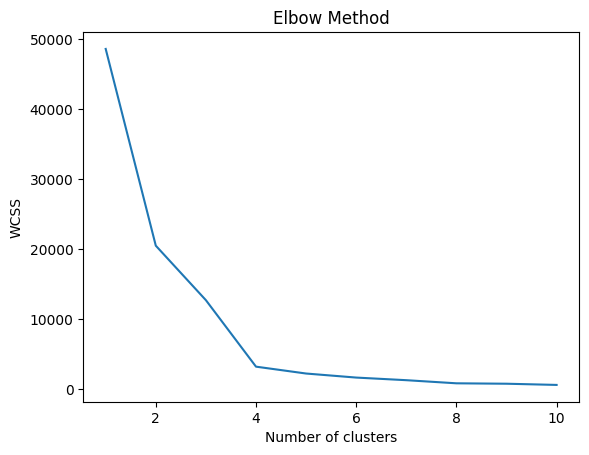

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [22]:
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)
df['Cluster']

,Cluster
0,2
1,0
2,5
3,1
4,0
...,...
48615,0
48616,5
48617,2
48618,1


In [25]:
from google.colab import files
files.download('Pizzasales.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>